<a href="https://colab.research.google.com/github/Shaif95/AICamp_DS/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd

def get_stock_data(stock):
    # URL of the raw CSV file on GitHub
    csv_url = 'https://raw.githubusercontent.com/yumoxu/stocknet-dataset/master/price/raw/' + stock + '.csv'

    # Read the CSV data into a pandas DataFrame
    df = pd.read_csv(csv_url)

    # Return the DataFrame
    return df

# Example usage
stock = 'V'
data = get_stock_data(stock)
print(data.head(3))


         Date       Open       High        Low      Close  Adj Close    Volume
0  2012-09-04  32.090000  32.287498  31.905001  32.130001  29.126745  10200800
1  2012-09-05  32.215000  32.250000  31.737499  31.902500  28.920511  12698800
2  2012-09-06  32.044998  32.375000  31.950001  32.375000  29.348850  15698400


In [16]:
import pandas as pd

def create_XY(data):
    # Create X and Y
    X = data.iloc[1:].drop(columns=['Date']).values
    Y = data.iloc[1:]['Open'].shift(-1).dropna().values

    return X[1:-1], Y[1:]

X, Y = create_XY(data)


In [8]:
X.shape

(1255, 6)

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Perform train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [18]:
# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred = model.predict(X_test)


In [19]:
# Calculate evaluation metrics
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

# Print evaluation metrics
print("Mean Squared Error (MSE): {:.2f}".format(mse))
print("Coefficient of Determination (R^2): {:.2f}".format(r2))


Mean Squared Error (MSE): 0.42
Coefficient of Determination (R^2): 1.00


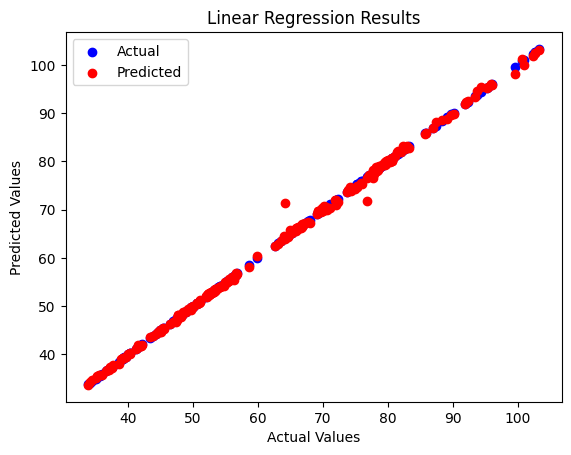

In [20]:
# Set colors for test and predicted points
test_color = 'blue'
pred_color = 'red'

# Create a scatter plot of test values
plt.scatter(Y_test, Y_test, c=test_color, label='Actual')

# Create a scatter plot of predicted values
plt.scatter(Y_test, Y_pred, c=pred_color, label='Predicted')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression Results')
plt.legend()
plt.show()


Epoch 1/100
40/40 [==============================] - 2s 3ms/step - loss: 0.1688
Epoch 2/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0901
Epoch 3/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0893
Epoch 4/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0890
Epoch 5/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0884
Epoch 6/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0880
Epoch 7/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0877
Epoch 8/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0879
Epoch 9/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0868
Epoch 10/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0864
Epoch 11/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0862
Epoch 12/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0867
Epoch 13/100
40/40 [=================

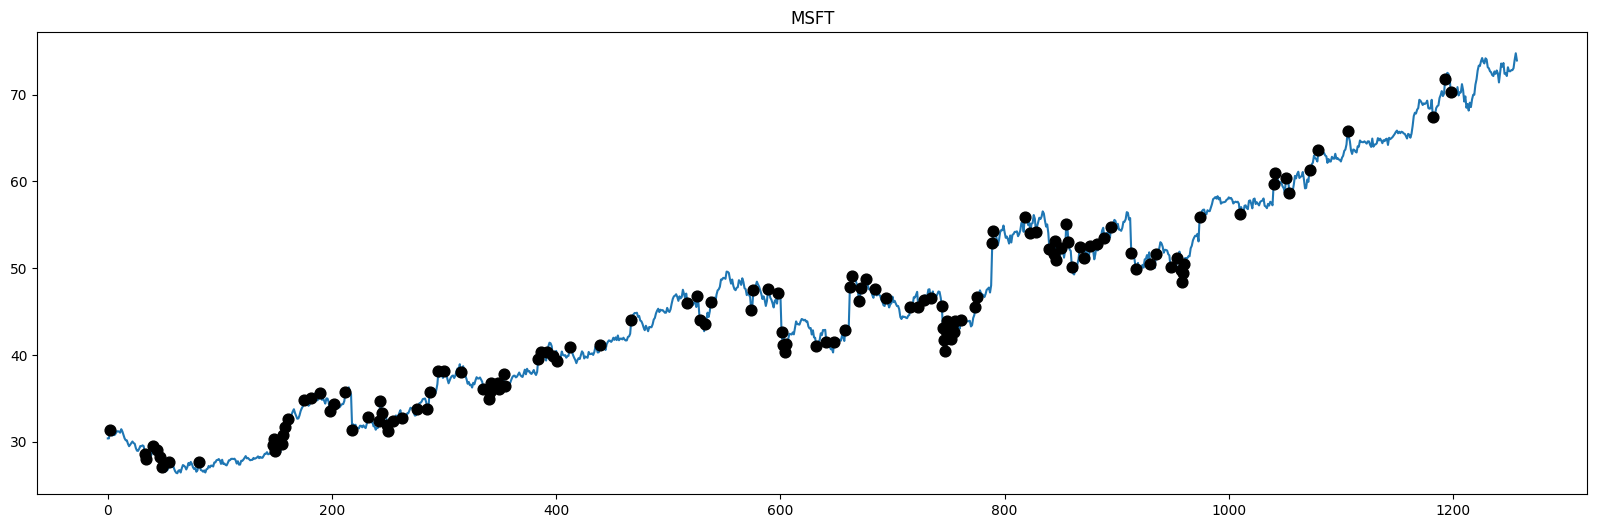

In [ ]:
# Example usage
stock = 'MSFT'
tll = stock
AAPL_df = get_stock_data(stock)
data, df = get_markers1(AAPL_df, .2)
Y = pd.Categorical(data['Marker']).map({'yes': 1, 'no': 0})
df = data.drop(['Date', 'Marker'], axis=1)
X = []

for _, row in df.iterrows():

    rows_to_add = []
    for i in range(5, len(row)):
        rows_to_add.append(row[i-5:i].tolist())
    X.append(rows_to_add[-5:])

X = np.array(X[:-5])
Y = np.array(Y[:-5])
flattened_X = np.reshape(X, (X.shape[0], -1))
X = flattened_X

In [ ]:
np.shape(X)

(1253, 6)